<a href="https://colab.research.google.com/github/Aayush6377/Machine-Learning-Lab-programs-Sem-6/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Write a Python program to predict House Price Prediction using Linear Regression**

In [ ]:
#Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
#Loading the dataset
df=pd.read_csv("/content/House Price India.csv")
print("Dataset columns: ",df.columns)
print("Dataset 5 rows and 5 columns:-")
print(df.iloc[:5,:5])
df.shape

Dataset columns:  Index(['id', 'Date', 'bedrooms', 'bathrooms', 'living area', 'lot area',
       'floors', 'waterfront present', 'views', 'condition', 'grade', 'Area',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')
Dataset 5 rows and 5 columns:-
           id   Date  bedrooms  bathrooms  living area
0  6762810145  42491         5       2.50         3650
1  6762810635  42491         4       2.50         2920
2  6762810998  42491         5       2.75         2910
3  6762812605  42491         4       2.50         3310
4  6762812919  42491         3       2.00         2710


(14620, 22)

In [ ]:
#Split the dataset into training and testing sets
x=df[["bedrooms","bathrooms","floors","condition","grade","Number of schools nearby",
      "Distance from the airport","Area","living area","lot area","Built Year",
      "waterfront present","views","living_area_renov","lot_area_renov"]]
y=df["Price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print("x_train 5 rows: \n",x_train.iloc[:5,:2])
print("x_test 5 rows: \n",x_test.iloc[:5,:2])
print("y_train 5 rows: \n",y_train[:5])
print("y_test 5 rows: \n",y_test[:5])

x_train 5 rows: 
        bedrooms  bathrooms
6459          3       2.50
10885         4       1.75
1369          4       1.50
740           2       1.00
3474          4       2.25
x_test 5 rows: 
        bedrooms  bathrooms
3837          1       1.50
4098          3       2.50
357           2       1.00
11768         5       2.50
9751          3       2.75
y_train 5 rows: 
 6459     650000
10885    309600
1369     275000
740      267800
3474     305000
Name: Price, dtype: int64
y_test 5 rows: 
 3837     235000
4098     552000
357      615000
11768    555000
9751     649950
Name: Price, dtype: int64


In [ ]:
#Creating, training and predicting the model
model=PolynomialFeatures(degree=3, include_bias=False)
model=make_pipeline(model, LinearRegression())
model.fit(x_train,y_train)
y_predic=model.predict(x_test)
print("Actual value: ",y_test[:5])
print("Predicted value: ",y_predic[:5])

Actual value:  3837     235000
4098     552000
357      615000
11768    555000
9751     649950
Name: Price, dtype: int64
Predicted value:  [406697.2671129  609280.81743924 396712.87800628 545019.31805788
 605905.7132042 ]


In [ ]:
#Evaluate the model
mae=mean_absolute_error(y_test,y_predic)
mse=mean_squared_error(y_test,y_predic)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predic)

print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)
print("R² Score:",r2)

Mean Absolute Error:  122617.86514280086
Mean Squared Error:  36720936416.48904
Root Mean Squared Error:  191627.07641794527
R² Score: 0.7394180390194971


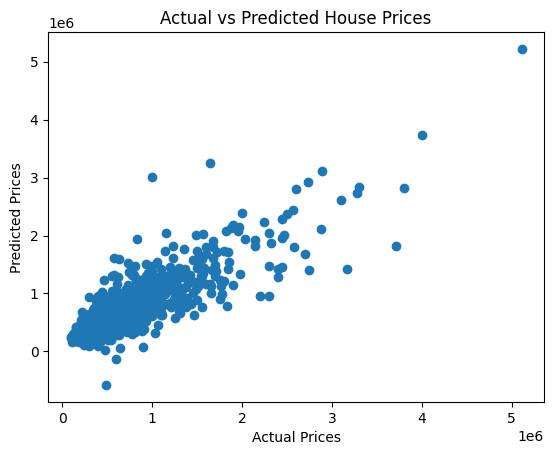

In [ ]:
#Visualizing actual vs predicted prices
plt.scatter(y_test, y_predic)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()